# 4 - Validation - Reproduce Cumulative Installations and Waste from Heath 2020

This journal will reproduce the results from Garvin Heath & Tim Silverman's paper 2020. Plotting Cumulative Installations and Cumulative Waste, such that:

![Garvin Results](../images_wiki/GARVIN_2020.PNG)

Input is from IRENA projections:
![Input from IRENA_projections](../images_wiki/IRENA_projections.PNG)

Notes on IRENA Data:
- Installation Data < 2010 from D. Jordan (Values too low to digitize properly)
- Installation data >= 2010 from IRENA report (digitized from plot)


Other considerations:
  <ul> 
    <li> Global projected installations from IEA/IRENA (picture below). </li>
    <li> No recycling, no reuse, no repair.  </li>
    <li> 30-year average lifetime with early lifetime failures </li>
    <li> Power to Glass conversion: 76 t/MW </li>
</ul>

In [1]:
import os
from pathlib import Path

testfolder = str(Path().resolve().parent.parent / 'PV_ICE' / 'TEMP')

# Another option using relative address; for some operative systems you might need '/' instead of '\'
# testfolder = os.path.abspath(r'..\..\PV_DEMICE\TEMP')  

print ("Your simulation will be stored in %s" % testfolder)

Your simulation will be stored in C:\Users\sayala\Documents\GitHub\CircularEconomy-MassFlowCalculator\PV_ICE\TEMP


In [2]:
import PV_ICE

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams.update({'font.size': 22})
plt.rcParams['figure.figsize'] = (12, 5)

## PV ICE

In [4]:
r1 = PV_ICE.Simulation(name='Simulation1', path=testfolder)
r1.createScenario(name='Garvin_2020', file=r'..\baselines\baseline_modules_World_Irena_2019.csv')
r1.scenario['Garvin_2020'].addMaterial('glass', file=r'..\baselines\baseline_material_glass.csv')

path = C:\Users\sayala\Documents\GitHub\CircularEconomy-MassFlowCalculator\PV_ICE\TEMP


In [5]:
print(r1.scenario.keys())
print("")
print(r1.scenario['Garvin_2020'].data.keys())
print("")
print(r1.scenario['Garvin_2020'].material['glass'].materialdata.keys())

dict_keys(['Garvin_2020'])

Index(['year', 'new_Installed_Capacity_[MW]', 'mod_eff', 'mod_reliability_t50',
       'mod_reliability_t90', 'mod_degradation', 'mod_lifetime', 'mod_MFG_eff',
       'mod_EOL_collection_eff', 'mod_EOL_collected_recycled',
       'mod_Repowering', 'mod_Repairing'],
      dtype='object')

Index(['year', 'mat_virgin_eff', 'mat_massperm2', 'mat_MFG_eff',
       'mat_MFG_scrap_Recycled', 'mat_MFG_scrap_Recycling_eff',
       'mat_MFG_scrap_Recycled_into_HQ',
       'mat_MFG_scrap_Recycled_into_HQ_Reused4MFG',
       'mat_EOL_collected_Recycled', 'mat_EOL_Recycling_eff',
       'mat_EOL_Recycled_into_HQ', 'mat_EOL_RecycledHQ_Reused4MFG'],
      dtype='object')


Plot same plot from Garvin's paper from digitized data input

(0.0, 400.0)

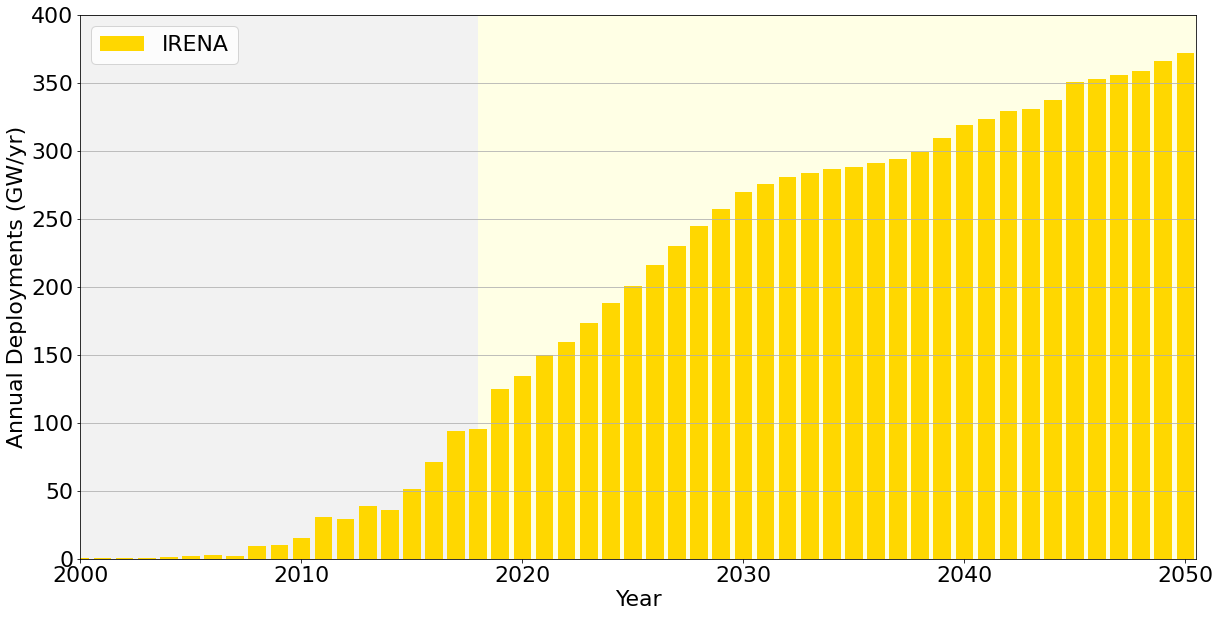

In [6]:
fig = plt.figure(figsize=(20,10))
ax1 = plt.subplot(111)
ax1.yaxis.grid()
plt.axvspan(2000, 2018, facecolor='0.9', alpha=0.5)
plt.axvspan(2018, 2050.5, facecolor='yellow', alpha=0.1)
ax1.bar(r1.scenario['Garvin_2020'].data['year'], r1.scenario['Garvin_2020'].data['new_Installed_Capacity_[MW]']/1000, color='gold', label='IRENA')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Annual Deployments (GW/yr)')
plt.xlim([2000, 2050.5])
plt.ylim([0, 400])


#### Adjusting input parameters to represent the inputs from the IRENA analysis:

In [15]:
r1.scenario['Garvin_2020'].data['mod_Repairing'] = 0
r1.scenario['Garvin_2020'].data['mod_Repowering'] = 0

r1.scenario['Garvin_2020'].data['mod_degradation'] = 0  # Their calculation does not consider degradation of the fleet.

#We're just calculating total waste so everythign goes to landfill
r1.scenario['Garvin_2020'].data['mod_EOL_collection_eff'] = 0  

# Setting the shape of the weibull 
r1.scenario['Garvin_2020'].data['mod_reliability_t50'] = 45
r1.scenario['Garvin_2020'].data['mod_reliability_t90'] = 50
# Setting Project Lifetime beyond Failures
r1.scenario['Garvin_2020'].data['mod_lifetime'] = 40

In [16]:
print(r1.scenario.keys())
print("")
print(r1.scenario['Garvin_2020'].data.keys())
print("")
print(r1.scenario['Garvin_2020'].material['glass'].materialdata.keys())

dict_keys(['Garvin_2020'])

Index(['year', 'new_Installed_Capacity_[MW]', 'mod_eff', 'mod_reliability_t50',
       'mod_reliability_t90', 'mod_degradation', 'mod_lifetime', 'mod_MFG_eff',
       'mod_EOL_collection_eff', 'mod_EOL_collected_recycled',
       'mod_Repowering', 'mod_Repairing', 'Area',
       'Cumulative_Area_disposedby_Failure',
       'Cumulative_Area_disposedby_ProjectLifetime',
       'Cumulative_Area_disposed', 'Cumulative_Active_Area',
       'Installed_Capacity_[W]', 'WeibullParams', 'EOL_on_Year_0',
       'EOL_on_Year_1', 'EOL_on_Year_2', 'EOL_on_Year_3', 'EOL_on_Year_4',
       'EOL_on_Year_5', 'EOL_on_Year_6', 'EOL_on_Year_7', 'EOL_on_Year_8',
       'EOL_on_Year_9', 'EOL_on_Year_10', 'EOL_on_Year_11', 'EOL_on_Year_12',
       'EOL_on_Year_13', 'EOL_on_Year_14', 'EOL_on_Year_15', 'EOL_on_Year_16',
       'EOL_on_Year_17', 'EOL_on_Year_18', 'EOL_on_Year_19', 'EOL_on_Year_20',
       'EOL_on_Year_21', 'EOL_on_Year_22', 'EOL_on_Year_23', 'EOL_on_Year_24',
       '

In [17]:
IRENA= True
ELorRL = 'RL'
if IRENA:
    if ELorRL == 'RL':
        weibullInputParams = {'alpha': 5.3759}  # Regular-loss scenario IRENA
    if ELorRL == 'EL':
        weibullInputParams = {'alpha': 2.49}  # Regular-loss scenario IRENA
    r1.calculateMassFlow(weibullInputParams=weibullInputParams, weibullAlphaOnly=True)
    title_Method = 'Irena_'+ELorRL
else:
    r1.calculateMassFlow()
    title_Method = 'PVICE'


Working on Scenario:  Garvin_2020
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass


In [18]:
print(r1.scenario.keys())
print("")
print(r1.scenario['Garvin_2020'].data.keys())
print("")
print(r1.scenario['Garvin_2020'].material['glass'].materialdata.keys())

dict_keys(['Garvin_2020'])

Index(['year', 'new_Installed_Capacity_[MW]', 'mod_eff', 'mod_reliability_t50',
       'mod_reliability_t90', 'mod_degradation', 'mod_lifetime', 'mod_MFG_eff',
       'mod_EOL_collection_eff', 'mod_EOL_collected_recycled',
       'mod_Repowering', 'mod_Repairing', 'Area',
       'Cumulative_Area_disposedby_Failure',
       'Cumulative_Area_disposedby_ProjectLifetime',
       'Cumulative_Area_disposed', 'Cumulative_Active_Area',
       'Installed_Capacity_[W]', 'WeibullParams', 'EoL_Collected',
       'EoL_NotCollected', 'EoL_Recycled', 'EoL_NotRecycled_Landfilled',
       'EOL_on_Year_0', 'EOL_on_Year_1', 'EOL_on_Year_2', 'EOL_on_Year_3',
       'EOL_on_Year_4', 'EOL_on_Year_5', 'EOL_on_Year_6', 'EOL_on_Year_7',
       'EOL_on_Year_8', 'EOL_on_Year_9', 'EOL_on_Year_10', 'EOL_on_Year_11',
       'EOL_on_Year_12', 'EOL_on_Year_13', 'EOL_on_Year_14', 'EOL_on_Year_15',
       'EOL_on_Year_16', 'EOL_on_Year_17', 'EOL_on_Year_18', 'EOL_on_Year_19',
       'EOL_on_

## Irena Conversion from Mass to Energy --> 
mat_Total_Landfilled is in g, 1 t --> 907.185 kg 
 1 MW --> 76 t conversion for the Mass in PV service.

Querying some of the values for plotting the flags

In [19]:
x2020 = r1.scenario['Garvin_2020'].data['year'].iloc[25]
y2020 = r1.scenario['Garvin_2020'].data['Installed_Capacity_[W]'].iloc[25]*76/1000000
t2020 = r1.scenario['Garvin_2020'].data['Installed_Capacity_[W]'].iloc[25]/(1E12)


x2030 = r1.scenario['Garvin_2020'].data['year'].iloc[35]
y2030 = r1.scenario['Garvin_2020'].data['Installed_Capacity_[W]'].iloc[35]*76/1000000
t2030 = r1.scenario['Garvin_2020'].data['Installed_Capacity_[W]'].iloc[35]/(1E12)

x2050 = r1.scenario['Garvin_2020'].data['year'].iloc[55]
y2050 = r1.scenario['Garvin_2020'].data['Installed_Capacity_[W]'].iloc[55]*76/1000000
t2050 = r1.scenario['Garvin_2020'].data['Installed_Capacity_[W]'].iloc[55]/(1E12)


Calculating Cumulative Waste isntead of yearly waste

Using glass for proxy of the module; glass is ~76% of the module's mass [REF]


In [20]:
cumWaste = r1.scenario['Garvin_2020'].material['glass'].materialdata['mat_Total_Landfilled'].cumsum()
cumWaste = (cumWaste*100/76)/907185.0  # Converting to tons.

PLOT:

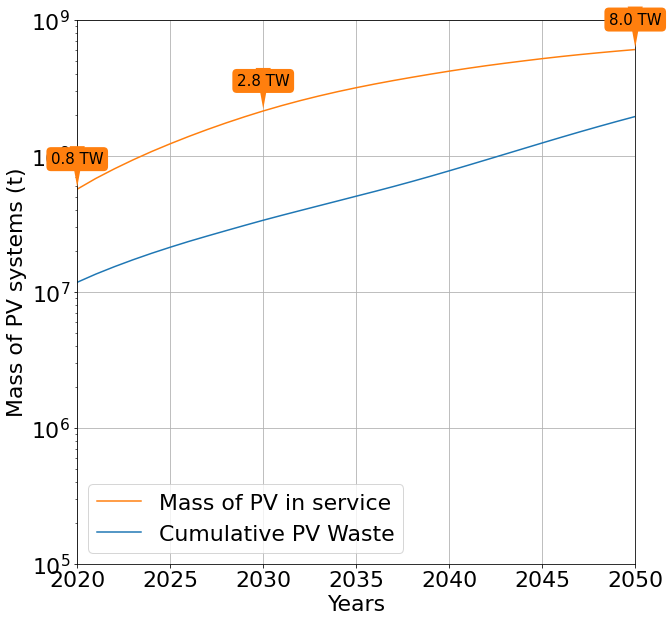

In [21]:
fig = plt.figure(figsize=(10,10))
plt.semilogy(r1.scenario['Garvin_2020'].data.year,r1.scenario['Garvin_2020'].data['Installed_Capacity_[W]']*76/1000000, color='C1', label='Mass of PV in service')
plt.semilogy(r1.scenario['Garvin_2020'].data.year,cumWaste, label='Cumulative PV Waste')
plt.ylim([1E5, 1E9])
plt.legend()
plt.tick_params(axis='y', which='minor')
plt.xlim([2020,2050])
plt.grid()
plt.ylabel('Mass of PV systems (t)')
plt.xlabel('Years')

offset = (0, 30)

plt.annotate(
    '{:.1f} TW'.format(t2050), (x2050, y2050),
    ha='center', va='center',
    size=15,
    xytext=offset, textcoords='offset points',
    bbox=dict(boxstyle='round', fc='#ff7f0e', ec='none'),
    arrowprops=dict(arrowstyle='wedge,tail_width=1.',
                    fc='#ff7f0e', ec='none',
                    relpos=(0.5, 1.5),
                    )
)

plt.annotate(
    '{:.1f} TW'.format(t2030), (x2030, y2030),
    ha='center', va='center',
    size=15,
    xytext=offset, textcoords='offset points',
    bbox=dict(boxstyle='round', fc='#ff7f0e', ec='none'),
    arrowprops=dict(arrowstyle='wedge,tail_width=1.',
                    fc='#ff7f0e', ec='none',
                    relpos=(0.5, 1.5),
                    )
)


plt.annotate(
    '{:.1f} TW'.format(t2020), (x2020, y2020),
    ha='center', va='center',
    size=15,
    xytext=offset, textcoords='offset points',
    bbox=dict(boxstyle='round', fc='#ff7f0e', ec='none'),
    arrowprops=dict(arrowstyle='wedge,tail_width=1.',
                    fc='#ff7f0e', ec='none',
                    relpos=(0.5, 1.5),
                    )
)

plt.show()




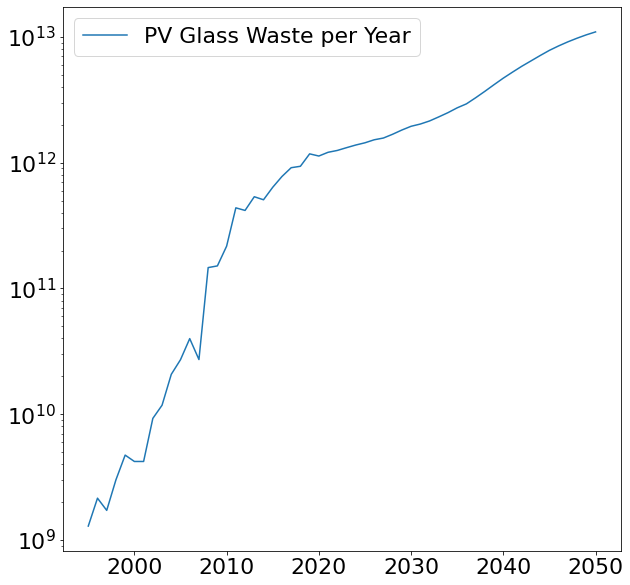

In [22]:
fig = plt.figure(figsize=(10,10))
plt.semilogy(r1.scenario['Garvin_2020'].data.year,r1.scenario['Garvin_2020'].material['glass'].materialdata['mat_Total_Landfilled'], label='PV Glass Waste per Year')
plt.legend()